<a href="https://colab.research.google.com/github/Amineelhaddioui/ChatBot/blob/main/ica_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydub
from pydub import AudioSegment
from pydub.playback import play
import IPython
import numpy as np
import wave

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
wav= wave.open("/content/drive/MyDrive/result_signal_1.wav","r")

In [ ]:
wav.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [ ]:
450560/44100

10.216780045351474

In [ ]:
signal_1_raw = wav.readframes(-1)


In [ ]:
signal_1 = np.fromstring(signal_1_raw, 'int16')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


In [ ]:
'length: ', len(signal_1) , 'first 100 elements: ',signal_1[:100]

('length: ',
 264515,
 'first 100 elements: ',
 array([-23, -16, -28, -11, -25, -15, -14, -19, -10, -17, -13,  -8, -16,
         -8, -14,  -9,  -9, -14,  -6, -16,  -1, -21,   0, -21,  -5, -13,
        -12, -10, -13, -13, -13, -13, -17, -11, -19, -13, -18, -21, -13,
        -27, -13, -25, -21, -25, -21, -28, -20, -35, -17, -38, -19, -34,
        -25, -30, -23, -32, -24, -29, -25, -19, -28, -15, -27, -14, -20,
        -14, -17,  -9, -15,  -8,  -9, -10,  -1, -11,   3, -13,   7,  -7,
          0,   5,  -8,  10, -10,  15, -12,  16,  -9,   9,   1,   1,   4,
          0,   1,   7,  -2,   6,  -1,   3,   2,   0], dtype=int16))

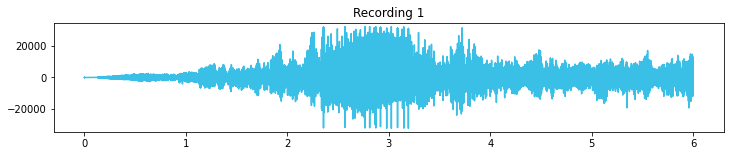

In [ ]:
import matplotlib.pyplot as plt

fs = wav.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))


plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(timing,signal_1, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()

In [ ]:
IPython.display.Audio("/content/drive/MyDrive/result_signal_1.wav")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


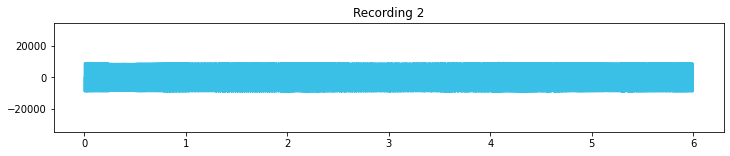

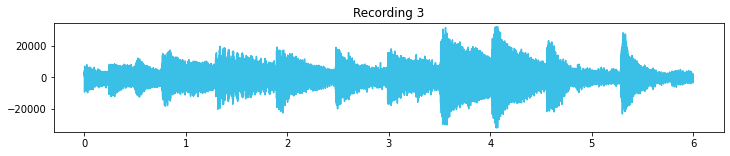

In [ ]:
mix_2_wave = wave.open("/content/drive/MyDrive/result_signal_2.wav",'r')

#Extract Raw Audio from Wav File
signal_raw_2 = mix_2_wave.readframes(-1)
signal_2 = np.fromstring(signal_raw_2, 'int16')


mix_3_wave = wave.open("/content/drive/MyDrive/result_signal_3.wav",'r')

#Extract Raw Audio from Wav File
signal_raw_3 = mix_3_wave.readframes(-1)
signal_3 = np.fromstring(signal_raw_3, 'int16')

plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(timing,signal_2, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()


plt.figure(figsize=(12,2))
plt.title('Recording 3')
plt.plot(timing,signal_3, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()

In [ ]:
IPython.display.Audio("/content/drive/MyDrive/result_signal_1.wav")


In [ ]:
IPython.display.Audio("/content/drive/MyDrive/result_signal_2.wav")

In [ ]:
IPython.display.Audio("/content/drive/MyDrive/result_signal_3.wav")

In [ ]:
X = list(zip(signal_1, signal_2, signal_3))

# Let's peak at what X looks like
X[:10]

[(-23, -52, 2142),
 (-16, -624, 2328),
 (-28, -1178, 2010),
 (-11, -1740, 1989),
 (-25, -2282, 1671),
 (-15, -2827, 1605),
 (-14, -3351, 1344),
 (-19, -3870, 1262),
 (-10, -4370, 1066),
 (-17, -4856, 976)]

In [ ]:
from sklearn.decomposition import FastICA

# Initializing FastICA with n_components=3
ica = FastICA(n_components=3)

# Running the FastICA algorithm using fit_transform on dataset X
ica_result = ica.fit_transform(X)

In [ ]:
ica_result.shape

(264515, 3)

In [ ]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]

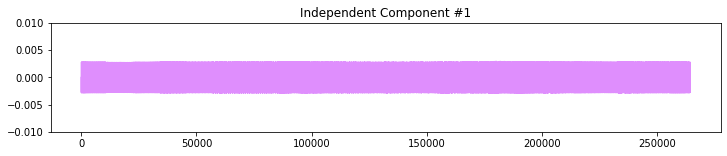

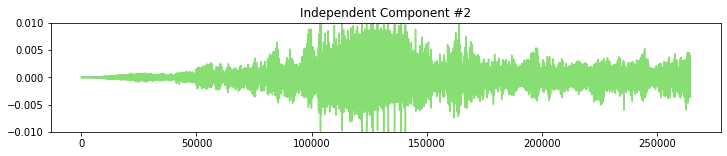

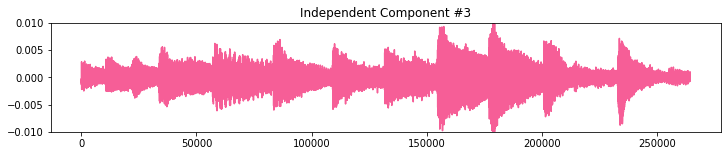

In [ ]:
# Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()


# Independent Component #3
plt.figure(figsize=(12,2))
plt.title('Independent Component #3')
plt.plot(result_signal_3, c="#f65e97")
plt.ylim(-0.010, 0.010)
plt.show()

In [ ]:
from scipy.io import wavfile

# Converting to int, mapping the appropriate range, and increasing the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)


# Writing wave files
wavfile.write("result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("result_signal_3.wav", fs, result_signal_3_int)

In [ ]:
IPython.display.Audio("result_signal_1.wav")

In [ ]:
IPython.display.Audio("result_signal_3.wav")

In [ ]:
IPython.display.Audio("result_signal_2.wav")